In [1]:
import tensorflow as tf 
import matplotlib.pyplot as plt
import matplotlib
import numpy as np
import glob
import PIL

In [2]:
config = tf.compat.v1.ConfigProto(allow_soft_placement=True)
config.gpu_options.per_process_gpu_memory_fraction = 0.7
tf.compat.v1.keras.backend.set_session(tf.compat.v1.Session(config=config))

In [3]:
xx=glob.glob('D:/data/dataset/training/[0-9][0-9][0-9][0-9][0-9].png')
yy=glob.glob('D:/data/dataset/training/*matte.png')
yy

['D:/data/dataset/training\\00001_matte.png',
 'D:/data/dataset/training\\00002_matte.png',
 'D:/data/dataset/training\\00003_matte.png',
 'D:/data/dataset/training\\00004_matte.png',
 'D:/data/dataset/training\\00005_matte.png',
 'D:/data/dataset/training\\00006_matte.png',
 'D:/data/dataset/training\\00007_matte.png',
 'D:/data/dataset/training\\00008_matte.png',
 'D:/data/dataset/training\\00009_matte.png',
 'D:/data/dataset/training\\00010_matte.png',
 'D:/data/dataset/training\\00011_matte.png',
 'D:/data/dataset/training\\00012_matte.png',
 'D:/data/dataset/training\\00013_matte.png',
 'D:/data/dataset/training\\00014_matte.png',
 'D:/data/dataset/training\\00015_matte.png',
 'D:/data/dataset/training\\00016_matte.png',
 'D:/data/dataset/training\\00017_matte.png',
 'D:/data/dataset/training\\00018_matte.png',
 'D:/data/dataset/training\\00019_matte.png',
 'D:/data/dataset/training\\00020_matte.png',
 'D:/data/dataset/training\\00021_matte.png',
 'D:/data/dataset/training\\00022_

In [4]:
a=PIL.Image.open(xx[0])
len(a.split())

3

In [5]:
def read(x):
    img=tf.io.read_file(x)
    img=tf.io.decode_png(img,channels=3)
    return img

In [6]:
def out(x):
    imgs=tf.io.read_file(x)
    imgs=tf.io.decode_png(imgs,channels=1)
    return imgs

In [125]:
print(out(yy[1]).numpy())

[[[  0]
  [  0]
  [  0]
  ...
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  ...
  [  0]
  [  0]
  [  0]]

 [[  0]
  [  0]
  [  0]
  ...
  [  0]
  [  0]
  [  0]]

 ...

 [[255]
  [254]
  [249]
  ...
  [255]
  [255]
  [255]]

 [[255]
  [254]
  [252]
  ...
  [255]
  [255]
  [255]]

 [[247]
  [253]
  [255]
  ...
  [255]
  [255]
  [255]]]


In [7]:
#数据增强
def npa(x,y):
    amg=tf.concat([x,y],axis=-1)
    amg=tf.image.resize(amg,(280,280),method=tf.image.ResizeMethod.NEAREST_NEIGHBOR)
    emg=tf.image.random_crop(amg,[256,256,4])
    return emg[:,:,:3],emg[:,:,3:]

In [9]:
def nbs(x,y):
    imgd=tf.cast(x,tf.float32)/127.5-1
    mask=tf.cast(y,tf.float32)/255.0
    return imgd,mask

In [10]:
def pin(x,y):
    imga=read(x)
    imge=out(y)
    imga,imge=npa(imga,imge)
    imga,imge=nbs(imga,imge)
    return imga,imge

In [11]:
train_data=tf.data.Dataset.from_tensor_slices((xx,yy))
tarin=train_data.map(pin)
tarin

<MapDataset shapes: ((256, 256, 3), (256, 256, 1)), types: (tf.float32, tf.float32)>

In [12]:
trains=tarin.take(len(xx))
train_data=trains.repeat().shuffle(len(xx)).batch(3)
train_data

<BatchDataset shapes: ((None, 256, 256, 3), (None, 256, 256, 1)), types: (tf.float32, tf.float32)>

In [13]:
inputs = tf.keras.layers.Input(shape = (256,256,3))
    
x = tf.keras.layers.Conv2D(64,3,padding="same",activation="relu")(inputs)
x = tf.keras.layers.BatchNormalization()(x)
x = tf.keras.layers.Conv2D(64,3,padding="same",activation="relu")(x)
x = tf.keras.layers.BatchNormalization()(x)  #  256*256*64
    # 下采样
x1 = tf.keras.layers.MaxPooling2D(padding="same")(x) # 128*128*64
    
    # 卷积 第二部分
x1 = tf.keras.layers.Conv2D(128,3,padding="same",activation="relu")(x1)
x1 = tf.keras.layers.BatchNormalization()(x1)
x1 = tf.keras.layers.Conv2D(128,3,padding="same",activation="relu")(x1)
x1 = tf.keras.layers.BatchNormalization()(x1)  #  128*128*128
    # 下采样 
x2 = tf.keras.layers.MaxPooling2D(padding="same")(x1) # 64*64*128
        
    # 卷积 第三部分
x2 = tf.keras.layers.Conv2D(256,3,padding="same",activation="relu")(x2)
x2 = tf.keras.layers.BatchNormalization()(x2)
x2 = tf.keras.layers.Conv2D(256,3,padding="same",activation="relu")(x2)
x2 = tf.keras.layers.BatchNormalization()(x2)  #  64*64*256
    # 下采样
x3 = tf.keras.layers.MaxPooling2D(padding="same")(x2) # 32*32*256
    
    # 卷积 第四部分
x3 = tf.keras.layers.Conv2D(512,3,padding="same",activation="relu")(x3)
x3 = tf.keras.layers.BatchNormalization()(x3)
x3 = tf.keras.layers.Conv2D(512,3,padding="same",activation="relu")(x3)
x3 = tf.keras.layers.BatchNormalization()(x3)  #  32*32*512
    # 下采样
x4 = tf.keras.layers.MaxPooling2D(padding="same")(x3) # 16*16*512
    # 卷积  第五部分
x4 = tf.keras.layers.Conv2D(1024,3,padding="same",activation="relu")(x4)
x4 = tf.keras.layers.BatchNormalization()(x4)
x4 = tf.keras.layers.Conv2D(1024,3,padding="same",activation="relu")(x4)
x4 = tf.keras.layers.BatchNormalization()(x4)  #  16*16*1024
    
    ## unet网络结构上采样部分
    
    # 反卷积 第一部分      512个卷积核 卷积核大小2*2 跨度2 填充方式same 激活relu
x5 = tf.keras.layers.Conv2DTranspose(512,2,strides=2,
                                         padding="same",
                                         activation="relu")(x4)#32*32*512
x5 = tf.keras.layers.BatchNormalization()(x5)
x6 = tf.concat([x3,x5],axis=-1)#合并 32*32*1024
    # 卷积
x6 = tf.keras.layers.Conv2D(512,3,padding="same",activation="relu")(x6)
x6 = tf.keras.layers.BatchNormalization()(x6)
x6 = tf.keras.layers.Conv2D(512,3,padding="same",activation="relu")(x6)
x6 = tf.keras.layers.BatchNormalization()(x6)  #  32*32*512
    
    # 反卷积 第二部分
x7 = tf.keras.layers.Conv2DTranspose(256,2,strides=2,
                                         padding="same",
                                         activation="relu")(x6)#64*64*256
x7 = tf.keras.layers.BatchNormalization()(x7)
x8 = tf.concat([x2,x7],axis=-1)#合并 64*64*512
    # 卷积
x8 = tf.keras.layers.Conv2D(256,3,padding="same",activation="relu")(x8)
x8 = tf.keras.layers.BatchNormalization()(x8)
x8 = tf.keras.layers.Conv2D(256,3,padding="same",activation="relu")(x8)
x8 = tf.keras.layers.BatchNormalization()(x8)  #  #64*64*256
    
    # 反卷积 第三部分
x9 = tf.keras.layers.Conv2DTranspose(128,2,strides=2,
                                         padding="same",
                                         activation="relu")(x8)# 128*128*128
x9 = tf.keras.layers.BatchNormalization()(x9)
x10 = tf.concat([x1,x9],axis=-1)#合并 128*128*256
    # 卷积
x10 = tf.keras.layers.Conv2D(128,3,padding="same",activation="relu")(x10)
x10 = tf.keras.layers.BatchNormalization()(x10)
x10 = tf.keras.layers.Conv2D(128,3,padding="same",activation="relu")(x10)
x10 = tf.keras.layers.BatchNormalization()(x10)  # 128*128*128
    
    # 反卷积 第四部分
x11 = tf.keras.layers.Conv2DTranspose(64,2,strides=2,
                                         padding="same",
                                         activation="relu")(x10)#  256*256*64
x11 = tf.keras.layers.BatchNormalization()(x11)
x12 = tf.concat([x,x11],axis=-1)#合并 256*256*128
    # 卷积
x12 = tf.keras.layers.Conv2D(64,3,padding="same",activation="relu")(x12)
x12 = tf.keras.layers.BatchNormalization()(x12)
x12 = tf.keras.layers.Conv2D(64,3,padding="same",activation="relu")(x12)
x12 = tf.keras.layers.BatchNormalization()(x12)  # 256*256*64
    
    # 输出层 第五部分
output =tf.keras.layers.Conv2D(3,1,padding="same",activation="softmax")(x12)# 256*256*34
    

In [14]:
output.shape

TensorShape([None, 256, 256, 3])

In [15]:
model=tf.keras.models.Model(inputs=inputs,outputs=output)

In [20]:
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00005),loss='sparse_categorical_crossentropy',metrics=['acc'])

In [21]:
num=len(xx)//5

In [22]:
model.fit(train_data,steps_per_epoch=num,epochs=50)
model.save_weights('./unet.h5')

Epoch 1/50
340/340 [==============================] - 138s 406ms/step - loss: 0.7138 - acc: 0.7062
Epoch 2/50
340/340 [==============================] - 139s 410ms/step - loss: 0.4094 - acc: 0.8122
Epoch 3/50
340/340 [==============================] - 140s 411ms/step - loss: 0.3241 - acc: 0.8334
Epoch 4/50
340/340 [==============================] - 140s 412ms/step - loss: 0.2863 - acc: 0.8411
Epoch 5/50
340/340 [==============================] - 140s 413ms/step - loss: 0.2428 - acc: 0.8558
Epoch 6/50
340/340 [==============================] - 143s 419ms/step - loss: 0.2122 - acc: 0.8626
Epoch 7/50
340/340 [==============================] - 140s 413ms/step - loss: 0.1933 - acc: 0.8684
Epoch 8/50
340/340 [==============================] - 139s 409ms/step - loss: 0.1842 - acc: 0.8714
Epoch 9/50
340/340 [==============================] - 138s 406ms/step - loss: 0.1575 - acc: 0.8805
Epoch 10/50
340/340 [==============================] - 138s 406ms/step - loss: 0.1586 - acc: 0.8793
Epoch 11/

In [23]:
#model.load_weights('./unet.h5')

In [24]:
f=3

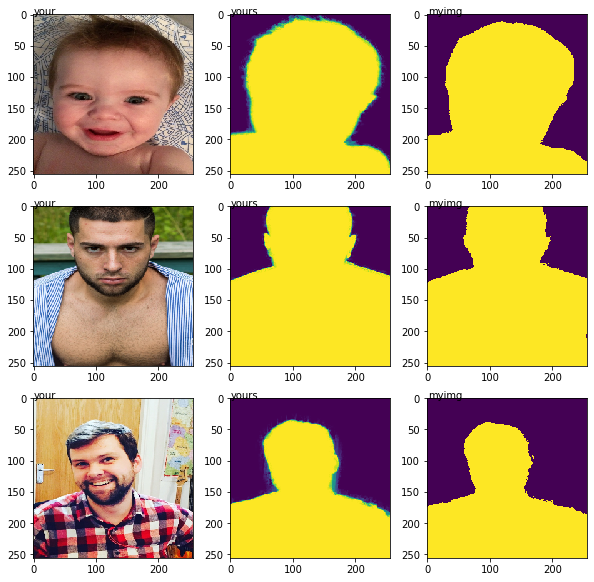

In [121]:
for img,mask in train_data.take(1):
    myimg=model.predict(img)
    myimg=tf.argmax(myimg,-1)
    myimg=myimg[...,tf.newaxis]
    plt.figure(figsize=(10,10))
    for i in range(f):
        plt.subplot(f,3,i*f+1)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(img[i]))
        plt.text(0.5,0.5,'your')
        plt.subplot(f,3,i*f+2)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(mask[i]))
        plt.text(0.5,0.5,'yours')
        plt.subplot(f,3,i*f+3)
        plt.imshow(tf.keras.preprocessing.image.array_to_img(myimg[i]))
        plt.text(0.5,0.5,'myimg')

In [122]:
import cv2
test_img=glob.glob('D:/data/dataset/testing/[0-9][0-9][0-9][0-9][0-9].png')
test_taget=glob.glob('D:/data/dataset/testing/*matte.png')
def test_load(batch):
    tests=[]
    for i in np.random.randint(0,len(test_img),size=batch):
        test=cv2.imread(test_img[i],cv2.COLOR_BGR2RGB)
        taget=cv2.imread(test_taget[i],cv2.IMREAD_GRAYSCALE)
        test = cv2.resize(test,(256, 256))
        taget = cv2.resize(taget,(256, 256))
        tests.append(test)
        return np.array(tests)/127.5-1,taget

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


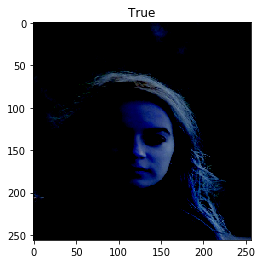

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


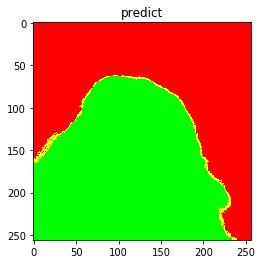

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


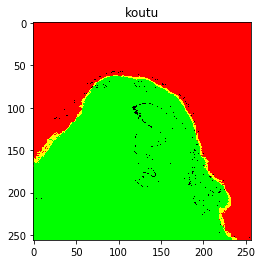

error: OpenCV(4.4.0) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-6sxsq0tp\opencv\modules\core\src\arithm.cpp:693: error: (-5:Bad argument) When the input arrays in add/subtract/multiply/divide functions have different types, the output array type must be explicitly specified in function 'cv::arithm_op'


In [123]:
test,taget=test_load(1)
plt.imshow(test[0])
plt.title('True')
plt.show()
model.load_weights('./unet.h5')
img=model.predict(test)[0]*255.0
#img=tf.keras.preprocessing.image.array_to_img(img)
img5=cv2.threshold(img,100,255,cv2.THRESH_BINARY)
plt.imshow(img5[1])
plt.title('predict')
plt.show()
test=test*127.5+1
img2=cv2.bitwise_and(np.array(test[0]).astype(np.float64),np.array(img5[1]).astype(np.float64))
plt.imshow(img2)
plt.title('koutu')
plt.show()
bg=np.zeros_like(img5[1])
bg[:,:,:]=(13,158,150)
bg=cv2.bitwise_and(bg,cv2.bitwise_not(img5[1]))
img4=cv2.add(bg,img2)
plt.imshow(img4)
plt.show()